In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan)

In [2]:
data = np.loadtxt("nb_05.39.53_1371.dat", unpack=True)
print(data[0])

[ 65.714554  65.033325  65.704643  65.304375  65.736946  65.330284
  65.742554  64.995956  65.251457  65.331497  65.845711  65.644211
  65.998016  65.857216  65.842697  66.342583  66.085091  66.308289
  65.647888  65.475754  64.885529  64.886993  64.076782  64.67868
  63.766644  63.678543  63.535992  64.084885  63.33794   63.935112
  63.335709  63.555889  63.106216  63.400822  63.059383  62.97411
  62.023506  61.51786   61.805923  61.382267  61.512585  61.275974
  60.623566  59.664829  60.290844  59.614666  60.213726  59.037476
  59.624001  59.111065  59.523056  58.991077  59.486645  59.829636
  60.036194  60.297829  60.314003  61.178108  61.022476  62.130833
  62.071655  63.13253   62.315636  63.182903  62.517956  63.441017
  63.321136  63.704071  63.004375  63.518425  63.493038  63.973545
  64.204659  64.178764  64.557556  64.836227  65.467102  65.61647
  65.589539  65.89373   66.024216  66.238655  66.837273  66.142815
  66.297852  65.606094  66.000557  65.673134  66.339828  65.48391

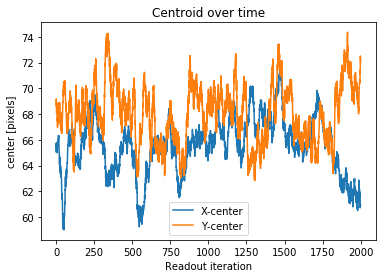

In [3]:
plt.plot (data[0], label="X-center")
plt.plot (data[1], label="Y-center")
plt.legend()
plt.title ("Centroid over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("center [pixels]")
plt.savefig ("nb_05.39.53_1371-xycentroid.png")

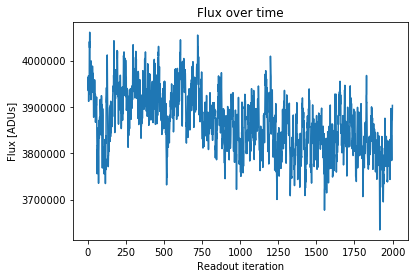

In [4]:
plt.figure()
plt.plot (data[2])
plt.title("Flux over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Flux [ADUs]")
plt.savefig ("nb_05.39.53_1371-flux.png")

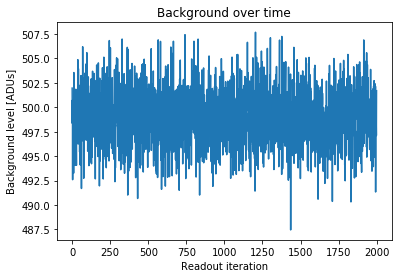

In [5]:
plt.figure()
plt.plot (data[3])
plt.title("Background over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Background level [ADUs]")
plt.savefig ("nb_05.39.53_1371-background.png")

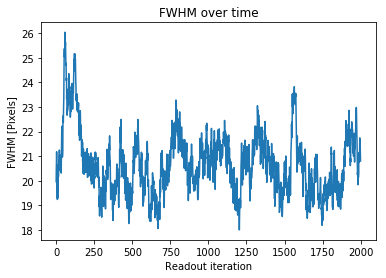

In [6]:
plt.figure()
plt.plot (data[4])
plt.title("FWHM over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("FWHM [Pixels]")
plt.savefig ("nb_05.39.53_1371-fwhm.png")

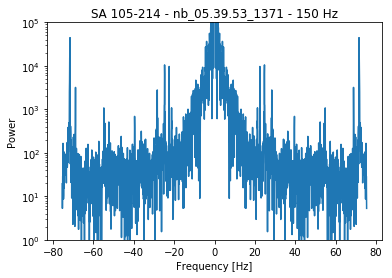

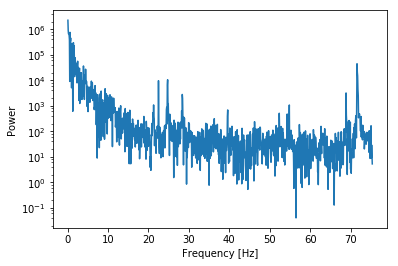

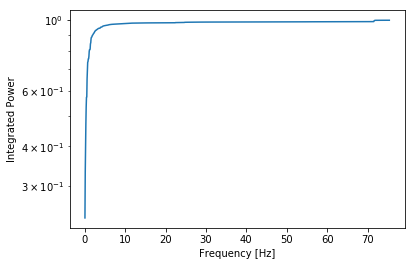

In [7]:
indata = data[0]# - np.mean (data[0])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.00663 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nb_05.39.53_1371 - 150 Hz")
plt.savefig ("nb_05.39.53_1371-powerspectrum.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig ("nb_05.39.53_1371-power.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig ("nb_05.39.53_1371-integratedpower.png")